## Purpose (walmart): 
#### The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Purpose (self):
#### To explore and see the relationship between sample and population; influence of sample size; 

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


### Read the csv file into data frame

In [191]:
df=pd.read_csv('walmart_data.csv')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [193]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


#### transaction id ( or any column which can act as transaction identifier) is not available, I have taken the sum of "Purchase" as
#### Purchase_Total for each User_ID. so the analysis is based on total purchase by each user, not average transaction amount.

In [194]:
df['User_ID'].nunique()

5891

#### There are 5891 unique users who have made 0.55 million transactions (?)

In [195]:
df['Product_ID'].nunique()

3631

#### there are 3631 unique products

In [196]:
df['Occupation'].nunique()

21

#### there are 21 unique occupations of users

In [197]:
df['Product_Category'].nunique()

20

#### there are as many as 20 Product Categories

In [285]:
df1=df.iloc[:,[0,2,3,4,5,6,7,9]]

#### Product ID and Product Category have been dropped for the purpose of performing groupby & merging operation

In [286]:
df1.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,8370
1,1000001,F,0-17,10,A,2,0,15200
2,1000001,F,0-17,10,A,2,0,1422
3,1000001,F,0-17,10,A,2,0,1057
4,1000002,M,55+,16,C,4+,0,7969


In [287]:
df1.shape

(550068, 8)

In [288]:
df2=df1.groupby('User_ID', as_index =False)['Purchase'].sum()

In [289]:
df2

,User_ID,Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000004,206468
4,1000005,821001
...,...,...
5886,1006036,4116058
5887,1006037,1119538
5888,1006038,90034
5889,1006039,590319


In [290]:
df2=df2.merge(df1, on='User_ID', how='inner')

In [291]:
df2

,User_ID,Purchase_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_y
0,1000001,334093,F,0-17,10,A,2,0,8370
1,1000001,334093,F,0-17,10,A,2,0,15200
2,1000001,334093,F,0-17,10,A,2,0,1422
3,1000001,334093,F,0-17,10,A,2,0,1057
4,1000001,334093,F,0-17,10,A,2,0,12842
...,...,...,...,...,...,...,...,...,...
550063,1006040,1653299,M,26-35,6,B,2,0,9855
550064,1006040,1653299,M,26-35,6,B,2,0,1962
550065,1006040,1653299,M,26-35,6,B,2,0,7852
550066,1006040,1653299,M,26-35,6,B,2,0,7159


#### Purchase_y is dropped off as it makes no meaning; Purchase_x is the total purchase amount of each user

In [293]:
df2=df2.drop(columns=['Purchase_y'])

In [294]:
df2

,User_ID,Purchase_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,334093,F,0-17,10,A,2,0
1,1000001,334093,F,0-17,10,A,2,0
2,1000001,334093,F,0-17,10,A,2,0
3,1000001,334093,F,0-17,10,A,2,0
4,1000001,334093,F,0-17,10,A,2,0
...,...,...,...,...,...,...,...,...
550063,1006040,1653299,M,26-35,6,B,2,0
550064,1006040,1653299,M,26-35,6,B,2,0
550065,1006040,1653299,M,26-35,6,B,2,0
550066,1006040,1653299,M,26-35,6,B,2,0


#### Purchase_x is renamed as Purchase_Total

In [295]:
df2=df2.rename(columns={'Purchase_x':'Purchase_Total'})

In [296]:
df2

,User_ID,Purchase_Total,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,334093,F,0-17,10,A,2,0
1,1000001,334093,F,0-17,10,A,2,0
2,1000001,334093,F,0-17,10,A,2,0
3,1000001,334093,F,0-17,10,A,2,0
4,1000001,334093,F,0-17,10,A,2,0
...,...,...,...,...,...,...,...,...
550063,1006040,1653299,M,26-35,6,B,2,0
550064,1006040,1653299,M,26-35,6,B,2,0
550065,1006040,1653299,M,26-35,6,B,2,0
550066,1006040,1653299,M,26-35,6,B,2,0


#### duplicate records are dropped off keeping the first intact

In [297]:
df2=df2.drop_duplicates(keep='first')

In [342]:
df2.shape

(5891, 8)

In [298]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 0 to 549888
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     5891 non-null   int64 
 1   Purchase_Total              5891 non-null   int64 
 2   Gender                      5891 non-null   object
 3   Age                         5891 non-null   object
 4   Occupation                  5891 non-null   int64 
 5   City_Category               5891 non-null   object
 6   Stay_In_Current_City_Years  5891 non-null   object
 7   Marital_Status              5891 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 414.2+ KB


In [299]:
df2.describe()

,User_ID,Purchase_Total,Occupation,Marital_Status
count,5.891000e+03,5.891000e+03,5891.000000,5891.000000
mean,1.003025e+06,8.650166e+05,8.153285,0.419963
std,1.743379e+03,9.436445e+05,6.323140,0.493594
min,1.000001e+06,4.668100e+04,0.000000,0.000000
25%,1.001518e+06,2.376780e+05,3.000000,0.000000
50%,1.003026e+06,5.212130e+05,7.000000,0.000000
75%,1.004532e+06,1.119250e+06,14.000000,1.000000
max,1.006040e+06,1.053691e+07,20.000000,1.000000


In [300]:
gender_data=df2['Gender'].value_counts()

In [301]:
gender_data 


Gender
M    4225
F    1666
Name: count, dtype: int64

In [507]:
4225+1666

5891

####  count of customers genderwise (Total number of customers = 5891; Male=4225, Female=1666); 5891 customers have done 
#### 0.55 million transactions

In [372]:
df2.groupby(['Gender'])['Purchase_Total'].mean()

Gender
F    712024.394958
M    925344.402367
Name: Purchase_Total, dtype: float64

### population_mean_Purchase_Total
#### male    = 925344.402367
#### female = 712024.394958

In [393]:
mean_Purchase_Total_Male_population=925344.402367

In [394]:
mean_Purchase_Total_Female_population=712024.394958

####  Product_ID, Gender, Age, Occupation, City_Category, Marital_Status, Product_Category are categorical variables

In [302]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5891 entries, 0 to 549888
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     5891 non-null   int64 
 1   Purchase_Total              5891 non-null   int64 
 2   Gender                      5891 non-null   object
 3   Age                         5891 non-null   object
 4   Occupation                  5891 non-null   int64 
 5   City_Category               5891 non-null   object
 6   Stay_In_Current_City_Years  5891 non-null   object
 7   Marital_Status              5891 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 414.2+ KB


In [303]:
df2.describe()

,User_ID,Purchase_Total,Occupation,Marital_Status
count,5.891000e+03,5.891000e+03,5891.000000,5891.000000
mean,1.003025e+06,8.650166e+05,8.153285,0.419963
std,1.743379e+03,9.436445e+05,6.323140,0.493594
min,1.000001e+06,4.668100e+04,0.000000,0.000000
25%,1.001518e+06,2.376780e+05,3.000000,0.000000
50%,1.003026e+06,5.212130e+05,7.000000,0.000000
75%,1.004532e+06,1.119250e+06,14.000000,1.000000
max,1.006040e+06,1.053691e+07,20.000000,1.000000


In [304]:
df2.describe(include='object')

,Gender,Age,City_Category,Stay_In_Current_City_Years
count,5891,5891,5891,5891
unique,2,7,3,5
top,M,26-35,C,1
freq,4225,2053,3139,2086


In [305]:
df2.isna().sum()

User_ID                       0
Purchase_Total                0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
dtype: int64

#### No null / NAs in the dataset.

In [306]:
age_data=df2['Age'].value_counts()

In [307]:
age_data

Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: count, dtype: int64

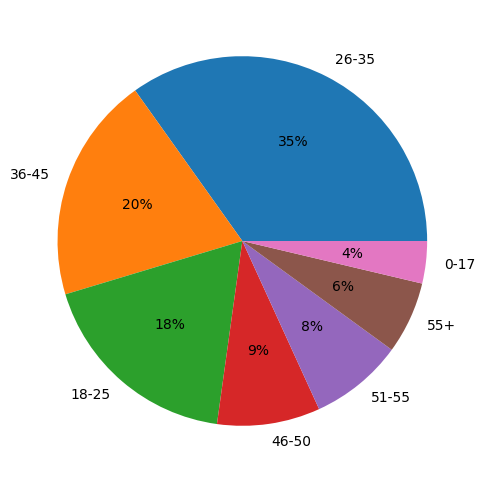

In [343]:
plt.figure(figsize=(10,6))
plt.pie(age_data,labels=age_data.index,autopct='%.0f%%')
plt.show()

In [309]:
occupation_data=df2['Occupation'].value_counts()

In [310]:
occupation_data

Occupation
4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: count, dtype: int64

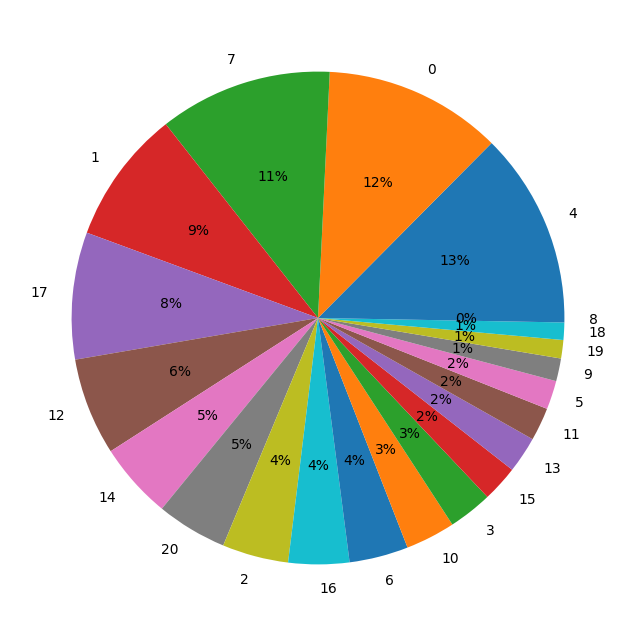

In [345]:
plt.figure(figsize=(12,8))
plt.pie(occupation_data,labels=occupation_data.index,autopct='%.0f%%')
plt.show()

In [312]:
city_data=df2['City_Category'].value_counts()

In [313]:
city_data

City_Category
C    3139
B    1707
A    1045
Name: count, dtype: int64

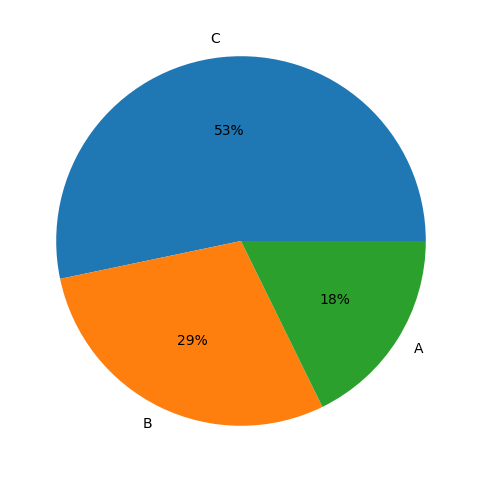

In [346]:
plt.figure(figsize=(10,6))
plt.pie(city_data,labels=city_data.index,autopct='%.0f%%')
plt.show()

#### Majority of the users are staying in City_Category "C", followed by "B" and "A"

In [347]:
stay_data=df2['Stay_In_Current_City_Years'].value_counts()

#### stay is considered as upto 1 year as 0; more than 1 year and less than 2 year as 1; more than 2 years and less than 3 years 
#### as 2; more than 3 years and less than 4 years as 3; more than 4 years as 4+ ( meaning 4 years or more)

In [348]:
stay_data

Stay_In_Current_City_Years
1     2086
2     1145
3      979
4+     909
0      772
Name: count, dtype: int64

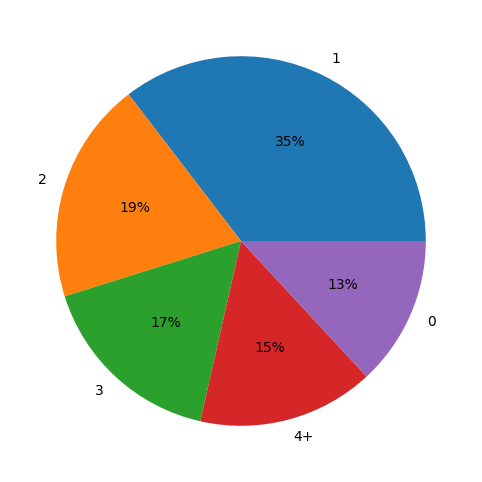

In [349]:
plt.figure(figsize=(10,6))
plt.pie(stay_data,labels=stay_data.index,autopct='%.0f%%')
plt.show()

#### Looks like population is more mobile in nature rather than staying in one place. more than 65% of people have changed their city in less than 3 years

<Axes: xlabel='Stay_In_Current_City_Years'>

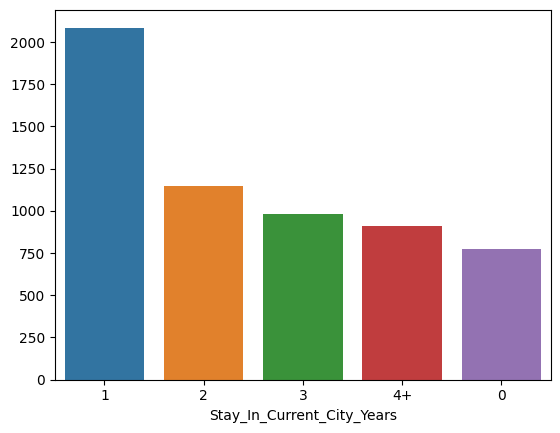

In [318]:
sns.barplot(x=stay_data.index,y=stay_data.values)

#### majority of the people changed the living city in a span of 1 to 2 years

In [319]:
prod_cat_data=df['Product_Category'].value_counts()

In [320]:
prod_cat_data

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

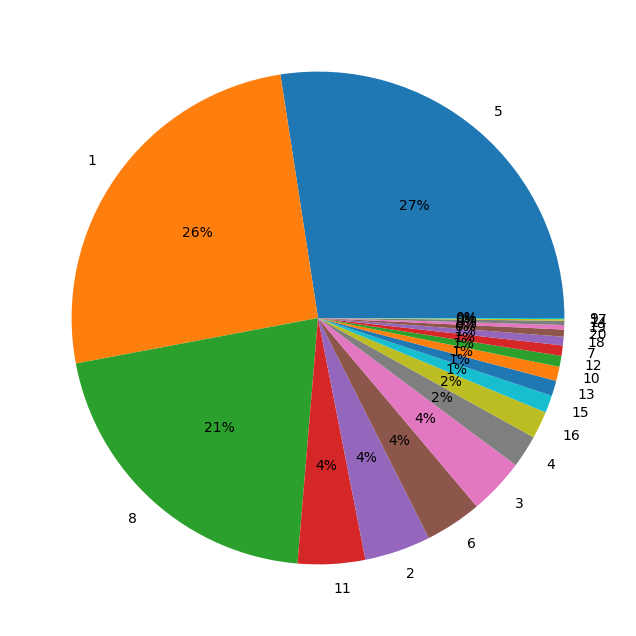

In [321]:
plt.figure(figsize=(12,8))
plt.pie(prod_cat_data,labels=prod_cat_data.index,autopct='%.0f%%')
plt.show()

#### Product Category 5, 1 & 8 together contributing almost 75% of all product categories

In [322]:
gender_data=df2['Gender'].value_counts()

In [323]:
gender_data

Gender
M    4225
F    1666
Name: count, dtype: int64

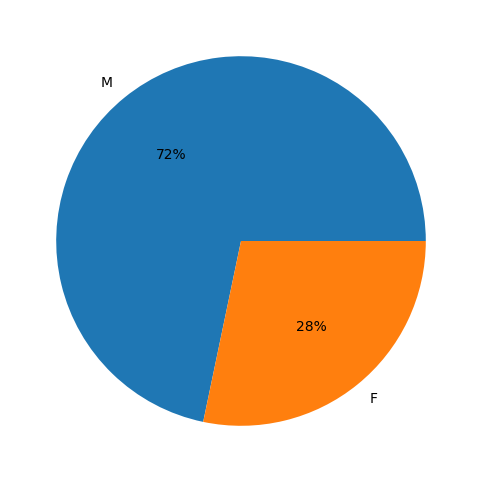

In [324]:
plt.figure(figsize=(10,6))
plt.pie(gender_data,labels=gender_data.index,autopct='%.0f%%')
plt.show()

#### 72% of the users are Male and 28% of users are female; this is looking contradictiory to the statement "assume 50% male 
#### and 50% female"

<Axes: xlabel='Gender', ylabel='Purchase_Total'>

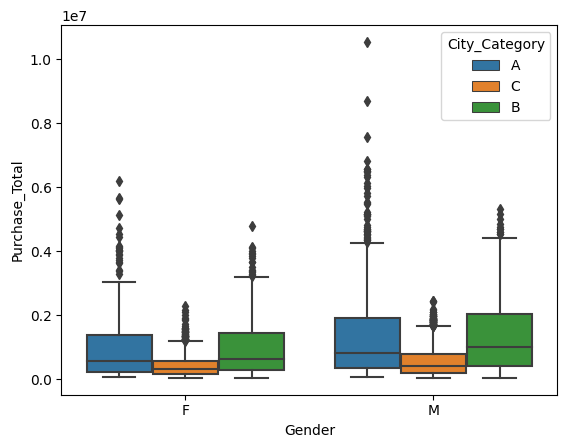

In [325]:
sns.boxplot(data=df2,x='Gender', y='Purchase_Total',hue='City_Category')

#### There are lot of outliers (wrt Purchase_Total); City category C has least variability where as "A" has most variability and 
#### also outliers. pattern is similar for both Male and Female users.

<Axes: xlabel='City_Category', ylabel='Purchase_Total'>

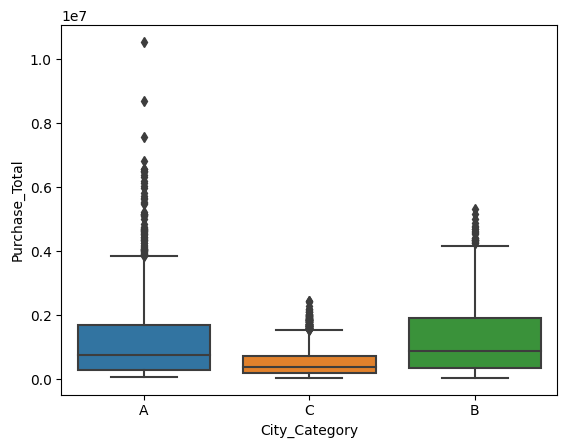

In [531]:
sns.boxplot(data=df2,x='City_Category', y='Purchase_Total')

#### City Category A abd B generate more revenue as purchase_Total is significantly higher for these two city categories.

In [326]:
sample_01=df2.sample(n=500, replace=True)

In [327]:
sample_01

,User_ID,Purchase_Total,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
458276,1005015,3352326,M,36-45,6,B,2,1
420825,1004558,121039,M,36-45,14,C,1,0
322311,1003585,1194023,M,36-45,20,A,0,1
485779,1005339,814105,M,18-25,17,C,1,0
185926,1001997,214683,M,26-35,0,A,0,1
...,...,...,...,...,...,...,...,...
510534,1005615,1456353,M,36-45,7,C,4+,0
546035,1005999,330227,F,26-35,1,A,0,1
451642,1004942,1497459,M,46-50,12,B,3,1
464914,1005084,854906,M,18-25,4,B,1,0


## sample_01 : a random sample of 500 users data from the dataframe

In [336]:
sample_01.describe()

,User_ID,Purchase_Total,Occupation,Marital_Status
count,5.000000e+02,5.000000e+02,500.000000,500.000000
mean,1.003000e+06,9.096876e+05,7.794000,0.390000
std,1.700266e+03,1.003857e+06,6.183529,0.488238
min,1.000013e+06,5.780500e+04,0.000000,0.000000
25%,1.001497e+06,2.536870e+05,2.000000,0.000000
50%,1.003034e+06,5.307290e+05,7.000000,0.000000
75%,1.004442e+06,1.091431e+06,14.000000,1.000000
max,1.006035e+06,6.310723e+06,20.000000,1.000000


In [337]:
sample_01.describe(include='object')

,Gender,Age,City_Category,Stay_In_Current_City_Years
count,500,500,500,500
unique,2,7,3,5
top,M,26-35,C,1
freq,369,168,247,163


In [338]:
sample_01['Gender'].value_counts()

Gender
M    369
F    131
Name: count, dtype: int64

In [339]:
sample_01.groupby(['Gender'])['Purchase_Total'].mean()

Gender
F    743053.183206
M    968845.116531
Name: Purchase_Total, dtype: float64

In [357]:
mean_Purchase_Total_Male_sample_01=968845.116531

In [358]:
mean_Purchase_Total_Female_sample_01=743053.183206

In [359]:
sample_01.groupby(['Gender'])['Purchase_Total'].std()

Gender
F    7.837921e+05
M    1.065855e+06
Name: Purchase_Total, dtype: float64

In [360]:
std_Purchase_Total_Male_sample_01= 1.065855e+06

In [361]:
std_Purchase_Total_Female_sample_01 = 7.837921e+05

In [539]:
CI_99_Male_sample_01=norm.interval(0.99,loc=mean_Purchase_Total_Male_sample_01,scale=(std_Purchase_Total_Male_sample_01/np.sqrt(369)))

In [540]:
CI_99_Male_sample_01

(825922.1495266496, 1111768.0835353504)

In [541]:
CI_99_Female_sample_01=norm.interval(0.99,loc=mean_Purchase_Total_Female_sample_01,scale=(std_Purchase_Total_Female_sample_01/np.sqrt(131)))

In [542]:
CI_99_Female_sample_01

(566659.7904377992, 919446.5759742009)

#### 99% Confidence Interval Fails as CI for Male and Female are overlapping for sample size 500


In [551]:
CI_95_Male_sample_01=norm.interval(0.95,loc=mean_Purchase_Total_Male_sample_01,scale=(std_Purchase_Total_Male_sample_01/np.sqrt(369)))

In [552]:
CI_95_Male_sample_01

(860094.1727063502, 1077596.0603556498)

In [553]:
CI_95_Female_sample_01=norm.interval(0.95,loc=mean_Purchase_Total_Female_sample_01,scale=(std_Purchase_Total_Female_sample_01/np.sqrt(131)))

In [555]:
CI_95_Female_sample_01

(608834.391432736, 877271.9749792641)

#### 95% Confidence Interval Fails as CI for Male and Female are overlapping for sample size 500

In [560]:
CI_90_Male_sample_01=norm.interval(0.90,loc=mean_Purchase_Total_Male_sample_01,scale=(std_Purchase_Total_Male_sample_01/np.sqrt(369)))

In [561]:
CI_90_Male_sample_01

(877578.447451696, 1060111.785610304)

In [564]:
CI_90_Female_sample_01=norm.interval(0.90,loc=mean_Purchase_Total_Female_sample_01,scale=(std_Purchase_Total_Female_sample_01/np.sqrt(131)))

In [565]:
CI_90_Female_sample_01

(630413.2223726859, 855693.1440393141)

#### with 90% Confidence we can say that Male spending is more than Female spending as CI for Male and Female don't overalp

In [340]:
sample_01.groupby(['Gender'])['Purchase_Total'].median()

Gender
F    446445.0
M    577734.0
Name: Purchase_Total, dtype: float64

#### median is robust estimate as it is not getting affected by outliers

<Axes: xlabel='Gender', ylabel='Purchase_Total'>

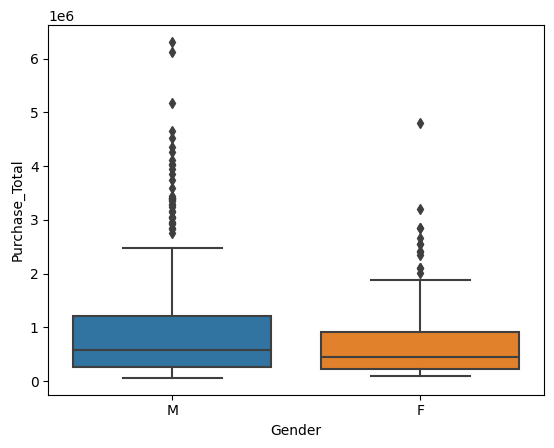

In [351]:
sns.boxplot(data=sample_01,x='Gender', y='Purchase_Total')

#### Male users are spending more compared to Female users as per the above box plot (90% confidence interval proves it)

<Axes: xlabel='Gender', ylabel='Purchase_Total'>

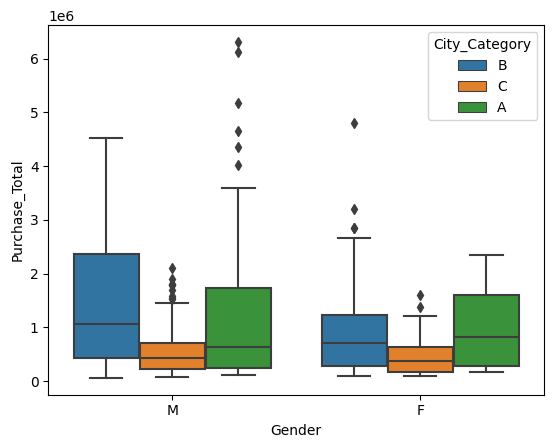

In [341]:
sns.boxplot(data=sample_01,x='Gender', y='Purchase_Total',hue='City_Category')

#### sample_01 shows similar charesterics as population

## sample_02 of random sample of 1000 from population data set 

In [378]:
sample_02=df2.sample(n=1000, replace=True)

In [379]:
sample_02.describe()

,User_ID,Purchase_Total,Occupation,Marital_Status
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,1.003049e+06,8.458714e+05,8.371000,0.415000
std,1.743358e+03,9.052564e+05,6.148753,0.492969
min,1.000024e+06,5.237100e+04,0.000000,0.000000
25%,1.001524e+06,2.353570e+05,4.000000,0.000000
50%,1.003076e+06,5.066885e+05,7.000000,0.000000
75%,1.004514e+06,1.116611e+06,14.000000,1.000000
max,1.006035e+06,6.477160e+06,20.000000,1.000000


In [380]:
sample_02.describe(include='object')

,Gender,Age,City_Category,Stay_In_Current_City_Years
count,1000,1000,1000,1000
unique,2,7,3,5
top,M,26-35,C,1
freq,707,328,526,341


In [381]:
sample_02['Gender'].value_counts()

Gender
M    707
F    293
Name: count, dtype: int64

In [382]:
sample_02.groupby(['Gender'])['Purchase_Total'].mean()

Gender
F    672692.119454
M    917641.632249
Name: Purchase_Total, dtype: float64

In [387]:
mean_Purchase_Total_Male_sample_02=917641.632249

In [388]:
mean_Purchase_Total_Female_sample_02=672692.119454

In [383]:
sample_02.groupby(['Gender'])['Purchase_Total'].std()

Gender
F    736764.861554
M    957848.422046
Name: Purchase_Total, dtype: float64

In [384]:
std_Purchase_Total_Male_sample_02=957848.422046

In [385]:
std_Purchase_Total_Female_sample_02=736764.861554

In [389]:
CI_95_Male_sample_02=norm.interval(0.95,loc=mean_Purchase_Total_Male_sample_02,scale=(std_Purchase_Total_Male_sample_02/np.sqrt(707)))

In [390]:
CI_95_Male_sample_02

(847036.6786020406, 988246.5858959594)

In [395]:
CI_95_Female_sample_02=norm.interval(0.95,loc=mean_Purchase_Total_Female_sample_02,scale=(std_Purchase_Total_Female_sample_02/np.sqrt(293)))

In [396]:
CI_95_Female_sample_02

(588330.8345648574, 757053.4043431426)

### since 95% Confidence Intervals are not overlapping for sample_02, we can say with 95% confidence that Male spending is more than Female spending towards "Purchase"

### 96% CI: Holds Good for sample size of 1000 users

In [401]:
CI_96_Male_sample_02=norm.interval(0.96,loc=mean_Purchase_Total_Male_sample_02,scale=(std_Purchase_Total_Male_sample_02/np.sqrt(707)))

In [402]:
CI_96_Male_sample_02

(843658.2081751737, 991625.0563228263)

In [403]:
CI_96_Female_sample_02=norm.interval(0.96,loc=mean_Purchase_Total_Female_sample_02,scale=(std_Purchase_Total_Female_sample_02/np.sqrt(293)))

In [404]:
CI_96_Female_sample_02

(584294.1191299096, 761090.1197780905)

### 97% CI: Holds Good for sample size of 1000 users

In [410]:
CI_97_Male_sample_02=norm.interval(0.97,loc=mean_Purchase_Total_Male_sample_02,scale=(std_Purchase_Total_Male_sample_02/np.sqrt(707)))

In [411]:
CI_97_Male_sample_02

(839467.1699998754, 995816.0944981247)

In [412]:
CI_97_Female_sample_02=norm.interval(0.97,loc=mean_Purchase_Total_Female_sample_02,scale=(std_Purchase_Total_Female_sample_02/np.sqrt(293)))

In [413]:
CI_97_Female_sample_02

(579286.5191355025, 766097.7197724975)

### 98% CI: Holds Good for sample size of 1000 users

In [414]:
CI_98_Male_sample_02=norm.interval(0.98,loc=mean_Purchase_Total_Male_sample_02,scale=(std_Purchase_Total_Male_sample_02/np.sqrt(707)))

In [566]:
CI_98_Male_sample_02

(833838.2128448924, 1001445.0516531076)

In [415]:
CI_98_Female_sample_02=norm.interval(0.98,loc=mean_Purchase_Total_Female_sample_02,scale=(std_Purchase_Total_Female_sample_02/np.sqrt(293)))

In [416]:
CI_98_Female_sample_02

(572560.8429095151, 772823.3959984849)

### 99% CI: Holds Good for sample size of 1000 users

In [417]:
CI_99_Male_sample_02=norm.interval(0.99,loc=mean_Purchase_Total_Male_sample_02,scale=(std_Purchase_Total_Male_sample_02/np.sqrt(707)))

In [418]:
CI_99_Male_sample_02

(824850.9942505021, 1010432.270247498)

In [423]:
CI_99_Female_sample_02=norm.interval(0.99,loc=mean_Purchase_Total_Female_sample_02,scale=(std_Purchase_Total_Female_sample_02/np.sqrt(293)))

In [424]:
CI_99_Female_sample_02

(561822.5976584327, 783561.6412495674)

### 99.5% CI: Holds Good for sample size of 1000 users

In [434]:
CI_995_Male_sample_02=norm.interval(0.995,loc=mean_Purchase_Total_Male_sample_02,scale=(std_Purchase_Total_Male_sample_02/np.sqrt(707)))

In [435]:
CI_995_Male_sample_02

(816522.1776760255, 1018761.0868219747)

In [436]:
CI_995_Female_sample_02=norm.interval(0.995,loc=mean_Purchase_Total_Female_sample_02,scale=(std_Purchase_Total_Female_sample_02/np.sqrt(293)))

In [437]:
CI_995_Female_sample_02

(551871.0343256086, 793513.2045823918)

### 99.7% CI: Holds Good for sample size of 1000 users

In [438]:
CI_997_Male_sample_02=norm.interval(0.997,loc=mean_Purchase_Total_Male_sample_02,scale=(std_Purchase_Total_Male_sample_02/np.sqrt(707)))

In [439]:
CI_997_Male_sample_02

(810733.0358115751, 1024550.2286864244)

In [440]:
CI_997_Female_sample_02=norm.interval(0.997,loc=mean_Purchase_Total_Female_sample_02,scale=(std_Purchase_Total_Female_sample_02/np.sqrt(293)))

In [441]:
CI_997_Female_sample_02

(544953.9637680302, 800430.2751399693)

### 99.8% CI: Holds Good for sample size of 1000 users

In [442]:
CI_998_Male_sample_02=norm.interval(0.998,loc=mean_Purchase_Total_Male_sample_02,scale=(std_Purchase_Total_Male_sample_02/np.sqrt(707)))

In [443]:
CI_998_Male_sample_02

(806320.3475435994, 1028962.9169544006)

In [444]:
CI_998_Female_sample_02=norm.interval(0.998,loc=mean_Purchase_Total_Female_sample_02,scale=(std_Purchase_Total_Female_sample_02/np.sqrt(293)))

In [445]:
CI_998_Female_sample_02

(539681.5284377408, 805702.7104702593)

#### 99.9% CI: Fails for sample size of 1000 users as confidence Intervals for Male and Female are slightky overlapping

In [547]:
CI_999_Male_sample_02=norm.interval(0.999,loc=mean_Purchase_Total_Male_sample_02,scale=(std_Purchase_Total_Male_sample_02/np.sqrt(707)))

In [548]:
CI_999_Male_sample_02

(799105.0217889939, 1036178.2427090072)

In [549]:
CI_999_Female_sample_02=norm.interval(0.999,loc=mean_Purchase_Total_Female_sample_02,scale=(std_Purchase_Total_Female_sample_02/np.sqrt(293)))

In [550]:
CI_999_Female_sample_02

(531060.4031467894, 814323.8357612119)

## sample_03 of size 200 random samples (users) from original dataframe

In [447]:
sample_03=df2.sample(n=200, replace=True)

In [448]:
sample_03.describe()

,User_ID,Purchase_Total,Occupation,Marital_Status
count,2.000000e+02,2.000000e+02,200.000000,200.000000
mean,1.003297e+06,8.268884e+05,7.200000,0.415000
std,1.719448e+03,8.982621e+05,6.025073,0.493958
min,1.000017e+06,7.593100e+04,0.000000,0.000000
25%,1.001968e+06,2.163305e+05,2.000000,0.000000
50%,1.003360e+06,4.813695e+05,6.000000,0.000000
75%,1.004948e+06,1.206569e+06,12.000000,1.000000
max,1.006033e+06,6.126540e+06,20.000000,1.000000


In [449]:
sample_03.describe(include='object')

,Gender,Age,City_Category,Stay_In_Current_City_Years
count,200,200,200,200
unique,2,7,3,5
top,M,26-35,C,1
freq,140,73,104,76


In [450]:
sample_03['Gender'].value_counts()

Gender
M    140
F     60
Name: count, dtype: int64

In [451]:
sample_03.groupby(['Gender'])['Purchase_Total'].mean()

Gender
F    730543.40
M    868179.05
Name: Purchase_Total, dtype: float64

In [452]:
mean_Purchase_Total_Male_sample_03=868179.05

In [453]:
mean_Purchase_Total_Female_sample_03=730543.40

In [454]:
sample_03.groupby(['Gender'])['Purchase_Total'].std()

Gender
F    808280.588110
M    933881.534706
Name: Purchase_Total, dtype: float64

In [461]:
std_Purchase_Total_Male_sample_03=933881.534706

In [466]:
std_Purchase_Total_Female_sample_03=808280.588110

### 95% CI Fails for sample size=200 as CI  for Male and Female are overlapping

In [467]:
CI_95_Male_sample_03=norm.interval(0.95,loc=mean_Purchase_Total_Male_sample_03,scale=(std_Purchase_Total_Male_sample_03/np.sqrt(140)))

In [468]:
CI_95_Male_sample_03

(713484.1979224844, 1022873.9020775157)

In [469]:
CI_95_Female_sample_03=norm.interval(0.95,loc=mean_Purchase_Total_Female_sample_03,scale=(std_Purchase_Total_Female_sample_03/np.sqrt(60)))

In [470]:
CI_95_Female_sample_03

(526023.9507168308, 935062.8492831693)

### 92% CI: Fails for sample size=200 as CI  for Male and Female are overlapping

In [471]:
CI_92_Male_sample_03=norm.interval(0.92,loc=mean_Purchase_Total_Male_sample_03,scale=(std_Purchase_Total_Male_sample_03/np.sqrt(140)))

In [472]:
CI_92_Male_sample_03

(730001.9585010072, 1006356.1414989928)

In [473]:
CI_92_Female_sample_03=norm.interval(0.92,loc=mean_Purchase_Total_Female_sample_03,scale=(std_Purchase_Total_Female_sample_03/np.sqrt(60)))

In [474]:
CI_92_Female_sample_03

(547861.8027949204, 913224.9972050795)

### 90% CI: Fails for sample size=200 as CI  for Male and Female are overlapping

In [475]:
CI_90_Male_sample_03=norm.interval(0.90,loc=mean_Purchase_Total_Male_sample_03,scale=(std_Purchase_Total_Male_sample_03/np.sqrt(140)))

In [476]:
CI_90_Male_sample_03

(738355.0376622757, 998003.0623377243)

In [477]:
CI_90_Female_sample_03=norm.interval(0.90,loc=mean_Purchase_Total_Female_sample_03,scale=(std_Purchase_Total_Female_sample_03/np.sqrt(60)))

In [478]:
CI_90_Female_sample_03

(558905.2675704987, 902181.5324295012)

### 85% CI: Fails for sample size=200 as CI  for Male and Female are overlapping

In [479]:
CI_85_Male_sample_03=norm.interval(0.85,loc=mean_Purchase_Total_Male_sample_03,scale=(std_Purchase_Total_Male_sample_03/np.sqrt(140)))

In [480]:
CI_85_Male_sample_03

(754560.5806228644, 981797.5193771358)

In [481]:
CI_85_Female_sample_03=norm.interval(0.85,loc=mean_Purchase_Total_Female_sample_03,scale=(std_Purchase_Total_Female_sample_03/np.sqrt(60)))

In [482]:
CI_85_Female_sample_03

(580330.3420130119, 880756.4579869882)

### 75% CI: Fails for sample size=200 as CI  for Male and Female are overlapping

In [483]:
CI_75_Male_sample_03=norm.interval(0.75,loc=mean_Purchase_Total_Male_sample_03,scale=(std_Purchase_Total_Male_sample_03/np.sqrt(140)))

In [484]:
CI_75_Male_sample_03

(777384.9697830165, 958973.1302169836)

In [485]:
CI_75_Female_sample_03=norm.interval(0.75,loc=mean_Purchase_Total_Female_sample_03,scale=(std_Purchase_Total_Female_sample_03/np.sqrt(60)))

In [486]:
CI_75_Female_sample_03

(610506.0811443953, 850580.7188556048)

### 65% CI: Fails for sample size=200 as CI  for Male and Female are overlapping

In [487]:
CI_65_Male_sample_03=norm.interval(0.65,loc=mean_Purchase_Total_Male_sample_03,scale=(std_Purchase_Total_Male_sample_03/np.sqrt(140)))

In [488]:
CI_65_Male_sample_03

(794414.3516299073, 941943.7483700928)

In [489]:
CI_65_Female_sample_03=norm.interval(0.65,loc=mean_Purchase_Total_Female_sample_03,scale=(std_Purchase_Total_Female_sample_03/np.sqrt(60)))

In [490]:
CI_65_Female_sample_03

(633020.3390539841, 828066.4609460158)

### 60% CI: Fails for sample size=200 as CI  for Male and Female are overlapping

In [491]:
CI_60_Male_sample_03=norm.interval(0.60,loc=mean_Purchase_Total_Male_sample_03,scale=(std_Purchase_Total_Male_sample_03/np.sqrt(140)))

In [492]:
CI_60_Male_sample_03

(801752.0782495926, 934606.0217504075)

In [493]:
CI_60_Female_sample_03=norm.interval(0.60,loc=mean_Purchase_Total_Female_sample_03,scale=(std_Purchase_Total_Female_sample_03/np.sqrt(60)))

In [494]:
CI_60_Female_sample_03

(642721.4233957987, 818365.3766042014)

### 58% CI: Fails for sample size=200 as CI  for Male and Female are overlapping

In [495]:
CI_58_Male_sample_03=norm.interval(0.58,loc=mean_Purchase_Total_Male_sample_03,scale=(std_Purchase_Total_Male_sample_03/np.sqrt(140)))

In [496]:
CI_58_Male_sample_03

(804530.3215010795, 931827.7784989206)

In [497]:
CI_58_Female_sample_03=norm.interval(0.58,loc=mean_Purchase_Total_Female_sample_03,scale=(std_Purchase_Total_Female_sample_03/np.sqrt(60)))

In [498]:
CI_58_Female_sample_03

(646394.4918407917, 814692.3081592084)

### 56% CI: Fails for sample size=200 as CI  for Male and Female are overlapping

In [499]:
CI_56_Male_sample_03=norm.interval(0.56,loc=mean_Purchase_Total_Male_sample_03,scale=(std_Purchase_Total_Male_sample_03/np.sqrt(140)))

In [500]:
CI_56_Male_sample_03

(807231.8509767423, 929126.2490232578)

In [501]:
CI_56_Female_sample_03=norm.interval(0.56,loc=mean_Purchase_Total_Female_sample_03,scale=(std_Purchase_Total_Female_sample_03/np.sqrt(60)))

In [502]:
CI_56_Female_sample_03

(649966.138299382, 811120.6617006181)

### 54% CI: Holds Good for sample size=200; 

In [503]:
CI_54_Male_sample_03=norm.interval(0.54,loc=mean_Purchase_Total_Male_sample_03,scale=(std_Purchase_Total_Male_sample_03/np.sqrt(140)))

In [504]:
CI_54_Male_sample_03

(809863.7927074193, 926494.3072925808)

In [505]:
CI_54_Female_sample_03=norm.interval(0.54,loc=mean_Purchase_Total_Female_sample_03,scale=(std_Purchase_Total_Female_sample_03/np.sqrt(60)))

In [506]:
CI_54_Female_sample_03

(653445.7839764967, 807641.0160235034)

### other parameters

In [508]:
df2

,User_ID,Purchase_Total,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,334093,F,0-17,10,A,2,0
35,1000002,810472,M,55+,16,C,4+,0
112,1000003,341635,M,26-35,15,A,3,0
141,1000004,206468,M,46-50,7,B,2,1
155,1000005,821001,M,26-35,20,A,1,1
...,...,...,...,...,...,...,...,...
549166,1006036,4116058,F,26-35,15,B,4+,1
549680,1006037,1119538,F,46-50,1,C,4+,0
549802,1006038,90034,F,55+,1,C,2,0
549814,1006039,590319,F,46-50,0,B,4+,1


<Axes: xlabel='Age', ylabel='Purchase_Total'>

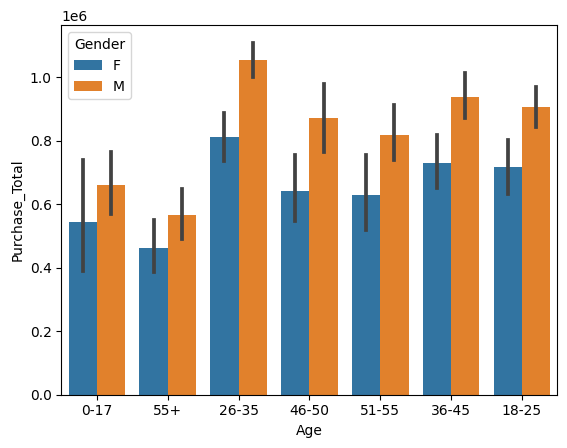

In [527]:
sns.barplot(x='Age',y='Purchase_Total', data=df2,hue='Gender')

<Axes: xlabel='Age', ylabel='Purchase_Total'>

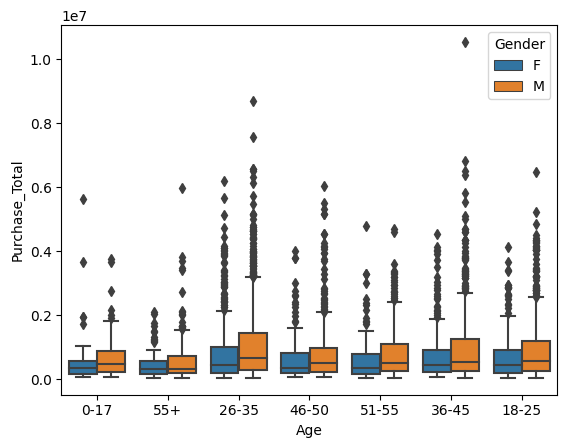

In [528]:
sns.boxplot(data=df2,x='Age', y='Purchase_Total',hue='Gender')

#### In each age group, Male users have Purchased more than Female users (even though Age groupwise Confidence Intervals 
#### are not calculated.
#### Age group 26-35 shows more Purchase_Totals followed by 36-45 age group
#### more outliers are seen in 26-35, 36-45 and also 46-50 age groups
#### spread of the data is more for Male compared to Females across all age groups

<Axes: xlabel='Purchase_Total', ylabel='Count'>

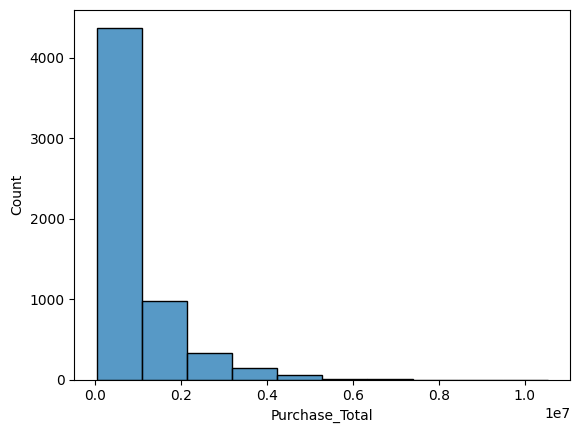

In [523]:
sns.histplot(data=df2,x='Purchase_Total',bins=10)

<Axes: xlabel='Purchase_Total', ylabel='Count'>

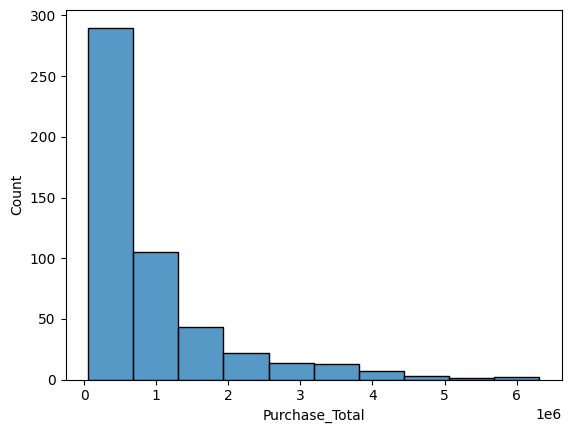

In [524]:
sns.histplot(data=sample_01,x='Purchase_Total',bins=10)

<Axes: xlabel='Purchase_Total', ylabel='Count'>

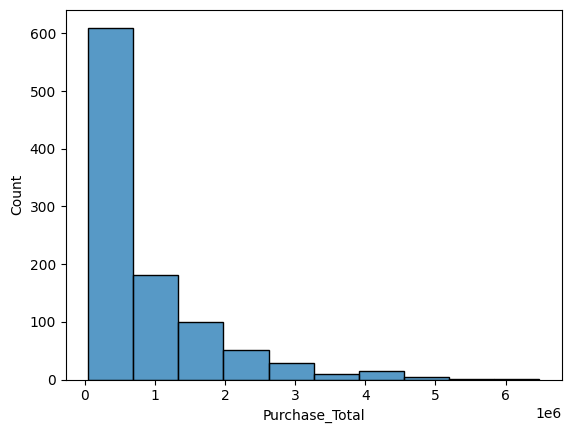

In [525]:
sns.histplot(data=sample_02,x='Purchase_Total',bins=10)

<Axes: xlabel='Purchase_Total', ylabel='Count'>

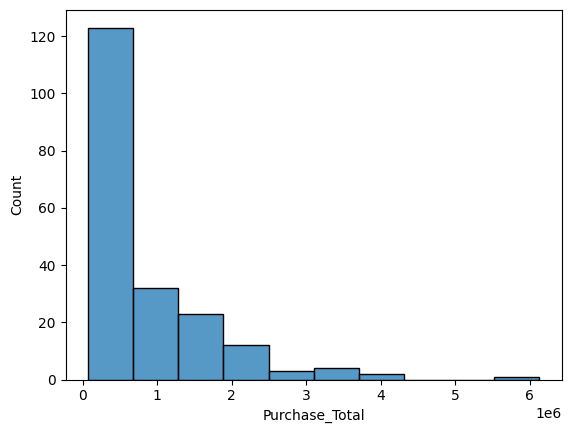

In [526]:
sns.histplot(data=sample_03,x='Purchase_Total',bins=10)

### Distribution pattern is similar (in main data frame and all samples 01-03, indicating samples are representative of the population)

In [568]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


### Approach & observations:
1. 3 samples were taken from population with sample sizes 200, 500 and 1000 from population of 5891 unique users. sampling with replacement is considered. 
2. Estimations were done on Average Purchase_Total from each sample. Larger sample size (1000) gave better estimates even at higher confidence levels (upto 99.8% CI). Lower sample size (200) does not give higher confidence level for the estimates.
3. Primary focus was given for Gender and CLT study. Other factors are not analysed in depth.

### Recommendations:
1. Male users are spending more than Female users. It can be viewed in two ways: 1: give more attention in selling to male users  2: focus more to understand why female users are not spending more... set the goal to generate more revenue from Female users by uncovering the unmet needs / wishes and introducing innovative solutions to attract more female users
2. Age groups 26-35, 36-45 and 46-55 are spending more. again 2 views: 1 focus more on generation more and more revenue from these age groups OR 2: understand the needs of other age groups and try to understand the limitations to increase the revenue from these groups.
3. City category A and B are spending more where as city Category C is showing less spends. Sell more in A and B cities; come out with innovative solutions to increase spending pattern in C category cities.
4. Product Category 5, 1 & 8 together contributing almost 75% of all product categories. ensure availability of these products and ensure smooth  and efficient supply chain management of these products. also try to deep dive into other product categories to understand how to increase sales of these products.